### Library importation

In [223]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sn
import matplotlib.pyplot as plt
import os

from sklearn.decomposition import PCA
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### Data Set Importation

In [261]:
rawData = pd.read_csv("C:/Users/erick.monge/Desktop/Big Data/Deliverables/Module 5/3.Build and Evaluate Models/default of credit card clients.csv",header=1)
#print(rawData.shape)
#rawData.head()
#rawData.sample(6)
#rawData.describe()
#rawData.info()
#Null Data Revision
#rawData.apply(lambda c: (c.replace(['Unknown', 'None', ''], np.nan).notna().sum() / c.size) * 100)
#total = rawData.isnull().sum().sort_values(ascending=False)
#print(total)

### Data Exploration - Covariance Analysis

Amount Data Matrix


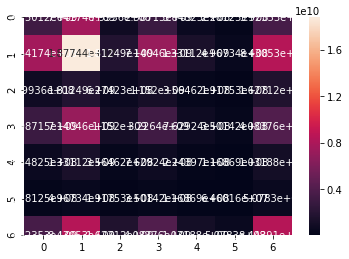

In [263]:
AmountData=rawData[11:18].to_numpy()
AmountMatrix = np.cov(AmountData)
print("Amount Data Matrix")
sn.heatmap(AmountMatrix, annot=True, fmt='g')


### Feature Selection

In [ ]:
rawData=rawData.drop("ID",axis=1)
rawData=rawData.drop("BILL_AMT1",axis=1)
rawData=rawData.drop("BILL_AMT2",axis=1)
rawData=rawData.drop("PAY_AMT1",axis=1)

### Data Preparation

In [264]:
rawData.rename(columns={"default payment next month": "DEFAULT"},inplace=True)

rawData['SEX']=rawData['SEX'].astype('category')
rawData['EDUCATION']=rawData['EDUCATION'].astype('category')
rawData['MARRIAGE']=rawData['MARRIAGE'].astype('category')
rawData['PAY_0']=rawData['PAY_0'].astype('category')
rawData['PAY_2']=rawData['PAY_2'].astype('category')
rawData['PAY_3']=rawData['PAY_3'].astype('category')
rawData['PAY_4']=rawData['PAY_4'].astype('category')
rawData['PAY_5']=rawData['PAY_5'].astype('category')
rawData['PAY_6']=rawData['PAY_6'].astype('category')
rawData['DEFAULT']=rawData['DEFAULT'].astype('category')
CreditData=rawData
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null category
dtypes: category(10), int64(11)
memory usage: 2.8 MB


### Feature Split

In [265]:
NotDepVar = CreditData.iloc[:,0:20]
depVar = CreditData['DEFAULT']
#print('Summary of feature sample')
NotDepVar.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,689,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,3272,3455,3261,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,13559,14331,14948,15549,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,49291,28314,28959,29547,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,35835,20940,19146,19131,36681,10000,9000,689,679


### Training Data Setup

In [266]:
X_train = NotDepVar[:22500]
y_train = depVar[:22500]
print('The number of observations in the Y training set are:',str(len(y_train.index)))
print('The number of observations in the X training set are:',str(len(X_train.index)))

The number of observations in the Y training set are: 22500
The number of observations in the X training set are: 22500


### Testing Data Setup

In [267]:
X_test = NotDepVar[22500:30000]
y_test = depVar[-7500:]
print('The number of observations in the feature testing set is:',str(len(X_test.index)))
print('The number of observations in the Y training set are:',str(len(y_test.index)))


The number of observations in the feature testing set is: 7500
The number of observations in the Y training set are: 7500


### Cross Validation

In [268]:
X_train, X_test, y_train, y_test = train_test_split(NotDepVar, depVar)
X_train.shape, X_test.shape

((22500, 20), (7500, 20))

### Normalization

In [269]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model - Logistic Regression

In [275]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train, y_train)
print(cross_val_score(LR, X_train, y_train))
print('Score: %.3f' % round(LR.score(X_train,y_train), 3))

#Prediction
LRprediction = LR.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, LRprediction))
predRsquared = r2_score(y_test,LRprediction)
accuracy=accuracy_score(LRprediction, y_test)
print('Accuracy: %.3f' % accuracy)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.808      0.80826667 0.80746667]
Score: 0.809
Accuracy: 0.812
R Squared: -0.085
RMSE: 0.433


### Model - SVM

In [277]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print(cross_val_score(SVM, X_train, y_train))
print('Score: %.3f' % round(SVM.score(X_train,y_train), 3))

#Prediction
SVMprediction = SVM.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, SVMprediction))
predRsquared = r2_score(y_test,SVMprediction)
accuracy=accuracy_score(SVMprediction, y_test)
print('Accuracy: %.3f' % accuracy)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
#SVM.predict(X)
#round(SVM.score(X,y_train), 3)

C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\erick.monge\AppData\Local\Continuu

[0.78266667 0.78706667 0.7804    ]
Score: 0.784
Accuracy: 0.784
R Squared: -0.247
RMSE: 0.464


### Model - Random Forest

In [278]:
RF = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
RF.fit(X_train, y_train)
RF.predict(X_train)
print(cross_val_score(RF, X_train, y_train))
print('Score: %.3f' % round(RF.score(X_train,y_train), 3))

#Prediction
RFprediction = RF.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, RFprediction))
predRsquared = r2_score(y_test,RFprediction)
accuracy=accuracy_score(RFprediction, y_test)
print('Accuracy: %.3f' % accuracy)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.816  0.8152 0.8204]
Score: 0.904
Accuracy: 0.822
R Squared: -0.030
RMSE: 0.422


### Model - KNN

In [273]:
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train, y_train)
KNN.predict(X_train)
print(cross_val_score(KNN, X_train, y_train))
print('Score: %.3f' % round(KNN.score(X_train,y_train), 3))

#Prediction
KNNprediction = KNN.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, KNNprediction))
predRsquared = r2_score(y_test,KNNprediction)
accuracy=accuracy_score(KNNprediction, y_test)
print('Accuracy: %.3f' % accuracy)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

C:\Users\erick.monge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80666667 0.80693333 0.80893333]
Score: 0.822
:Accuracy: 0.816
R Squared: -0.065
RMSE: 0.429


### Prediction Results

978

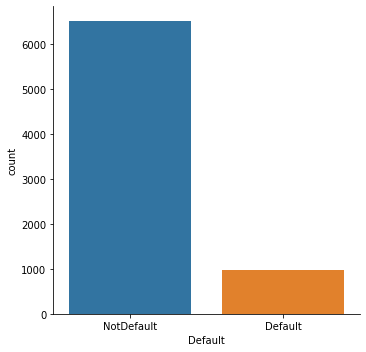

In [288]:
prediction=RFprediction
#predition.str.contains('0') = 'Not Default'
#predition.str.contains('1') = 'Default'
count=0
result=[]
for i in prediction:
    if i == 1:
        result.append("Default")
    if i == 0:
        result.append("NotDefault")
    count=count+1
#print(result)
result=pd.DataFrame(result, columns=['Default'])

graph = sns.catplot('Default', data=result, kind='count', aspect=1)

#index = result.Index()
#temp=index.value_counts()
result.describe()
7500-6522

In [188]:
#plt.plot(result)
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();
#sns.countplot(x="DEFAULT", data=Test)
#graph.set_xlabels('DEFAULT')
#ax = y_test.plot.bar()
#Test.rename(columns={0: "DEFAULT"},inplace=True)
#Test